# Report: Analysis of Bitcoin and Gold Prices Across Global Markets
=====================================================================================================
# Author: **[Ruchita Nathani](https://github.com/ruchita-nathani)**
-----------------------------------------------------------------------------------------------------

# Introduction
The aim of this project is to conduct an in-depth analysis of the relationship between Bitcoin and gold prices, taking into account the varying economic and regulatory environments. By exploring the impact of Bitcoin price fluctuations on gold prices, I hope to gain a better understanding of the factors that influence the value of these two assets and the ways in which they interact with each other. Through this research, I aim to provide valuable insights into the global markets and help investors make informed decisions about their investments.

- How does the price of Bitcoin affect the price of gold in various countries?

# Data Source

This project uses open data from the following data sources as follows :

1. Datasource1: Bitcoin Data
    - Metadata URL: https://www.kaggle.com/datasets/varpit94/bitcoin-data-updated-till-26jun2021
    - Data URL: https://www.kaggle.com/datasets/varpit94/bitcoin-data-updated-till-26jun2021/download?datasetVersionNumber=9
    - Data Type: CSV
    - Description: This dataset provides the history of the daily prices of Bitcoin.

2. Datasource2: Gold Prices Data
    - Metadata URL: https://www.kaggle.com/datasets/odins0n/monthly-gold-prices
    - Data URL: https://www.kaggle.com/datasets/odins0n/monthly-gold-prices/download?datasetVersionNumber=4
    - Data Type: CSV
    - Description: The database contains historic gold prices of different countries in their respective currencies

-----------------------------------------------------------------------------------------------------


## Preparation
### Install Dependencies

In [21]:
%pip install --upgrade pip
%pip install matplotlib==3.8.2
%pip install numpy==1.26.3
%pip install pandas==1.5.3
%pip install ==1.11.4
%pip install SQLAlchemy==1.4.46
%pip install kaggle==1.5.16
%pip install seaborn==0.11.2

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pi

### Import Dependencies

In [22]:
import subprocess
import pandas as pd
import os
from sqlalchemy import create_engine, FLOAT, BIGINT, NVARCHAR
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data into Sqlite Database

In [7]:
# Run datapipeline to create database if it doesn't exist
subprocess.run(["./pipeline.sh"])

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


Defaulting to user installation because normal site-packages is not writeable
  Using cached pytest-7.4.3-py3-none-any.whl.metadata (7.9 kB)
  Using cached iniconfig-2.0.0-py3-none-any.whl (5.9 kB)
  Using cached pluggy-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
Using cached pytest-7.4.3-py3-none-any.whl (325 kB)
Using cached pluggy-1.3.0-py3-none-any.whl (18 kB)


DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


CompletedProcess(args=['./pipeline.sh'], returncode=0)

In [12]:
# Load data from database
bitcoin_price_db_engine = create_engine('sqlite:///../data/bitcoin.sqlite')
gold_price_db_engine = create_engine('sqlite:///../data/gold-price.sqlite')

# Create dataframe from database
bitcoin_price_df = pd.read_sql_table('bitcoin', bitcoin_price_db_engine)
gold_price_df = pd.read_sql_table('gold-price', gold_price_db_engine)

print(bitcoin_price_df)

            Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2742  2022-03-21  41246.132813  41454.410156  40668.042969  41077.996094   
2743  2022-03-22  41074.105469  43124.707031  40948.281250  42358.808594   
2744  2022-03-23  42364.378906  42893.507813  41877.507813  42892.957031   
2745  2022-03-24  42886.652344  44131.855469  42726.164063  43960.933594   
2746  2022-03-25  43958.675781  44982.519531  43711.871094  44395.964844   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002 

### Analyze Data

          Date          Open          High           Low         Close  \
0   2014-09-30    376.088013    390.976990    373.442993    386.944000   
1   2014-10-31    345.009003    348.045013    337.141998    338.321014   
2   2014-11-28    369.373993    382.838013    358.454987    376.446991   
3   2014-12-31    310.914001    320.192993    310.210999    320.192993   
4   2015-01-30    232.772003    242.850998    225.839005    226.425003   
..         ...           ...           ...           ...           ...   
78  2021-03-31  58930.277344  59930.027344  57726.417969  58918.832031   
79  2021-04-30  53568.664063  57900.718750  53129.601563  57750.175781   
80  2021-05-31  35658.593750  37468.250000  34241.945313  37332.855469   
81  2021-06-30  35908.386719  36074.757813  34086.152344  35040.835938   
82  2021-07-30  40027.484375  42235.546875  38397.355469  42235.546875   

       Adj Close       Volume  United States(USD)  Europe(EUR)  Japan(JPY)  \
0     386.944000     34707300    

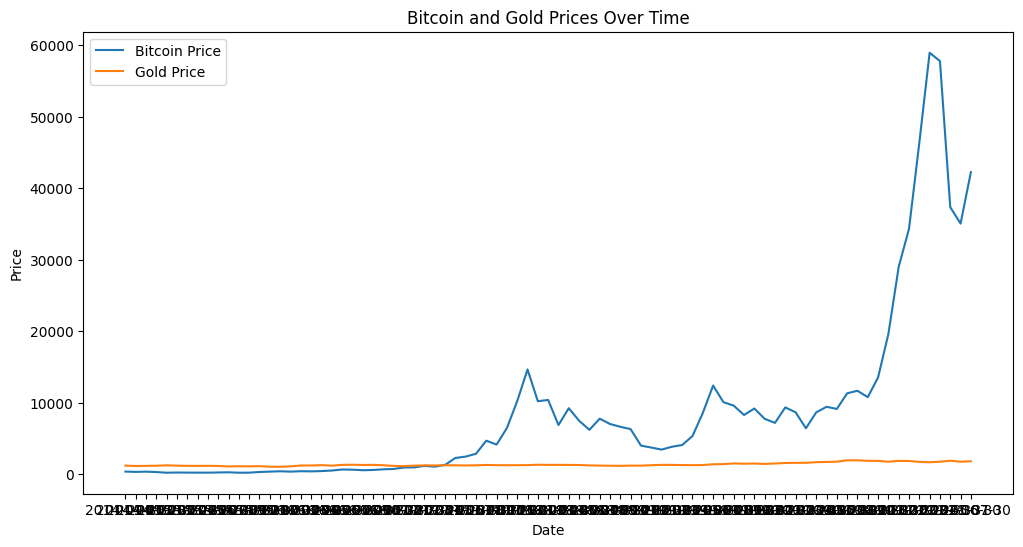

Correlation between Bitcoin and Gold Prices: 0.7011641225401418


In [24]:
# bitcoin_prices = bitcoin_price_df[bitcoin_price_df['Date'].isin(gold_price_df['Date'])]
# gold_prices = gold_price_df[gold_price_df['Date'].isin(bitcoin_price_df['Date'])]

# print(gold_prices)

merged_data = pd.merge(bitcoin_price_df, gold_price_df, on='Date', how='inner')
bitcoin_prices = bitcoin_price_df[bitcoin_price_df['Date'].isin(gold_price_df['Date'])]
print(merged_data)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=merged_data, label='Bitcoin Price')
sns.lineplot(x='Date', y='United States(USD)', data=merged_data, label='Gold Price')
plt.title('Bitcoin and Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

correlation = merged_data['Close'].corr(merged_data['United States(USD)'])
print(f"Correlation between Bitcoin and Gold Prices: {correlation}")